# ML algorithms: Naive Bayes Classifier

Adapted from: https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html

Citing Jake Van der Plas in the ["Python Data Science Handbook"](https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html)

>Naive Bayes models are a group of extremely fast and simple classification algorithms that are often suitable for very high-dimensional datasets. Because they are so fast and have so few tunable parameters, they end up being very useful as a quick-and-dirty baseline for a classification problem.

## When to Use Naive Bayes

>Because naive Bayesian classifiers make such stringent assumptions about data, they will generally not perform
>as well as a more complicated model. That said, they have several advantages:
>
>- They are extremely fast for both training and prediction
>- They provide straightforward probabilistic prediction
>- They are often very easily interpretable
>- They have very few (if any) tunable parameters
>- These advantages mean a naive Bayesian classifier is often a good choice as an initial baseline classification. If it performs suitably, then congratulations: you have a very fast, very interpretable classifier for your problem. If it does not perform well, then you can begin exploring more sophisticated models, with some baseline knowledge of how well they should perform.
>
>Naive Bayes classifiers tend to perform especially well in one of the following situations:
>
>- When the naive assumptions actually match the data (very rare in practice)
>- For very well-separated categories, when model complexity is less important
>- For very high-dimensional data, when model complexity is less important
>- The last two points seem distinct, but they actually are related: as the dimension of a dataset grows, it is much less likely for any two points to be found close together (after all, they must be close in every single dimension to be close overall). This means that clusters in high dimensions tend to be more separated, on average, than clusters in low dimensions, assuming the new dimensions actually add information. For this reason, simplistic classifiers like naive Bayes tend to work as well or better than more complicated classifiers as the dimensionality grows: once you have enough data, even a simple model can be very powerful.

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [78]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)

# Gaussian Naive Bayes

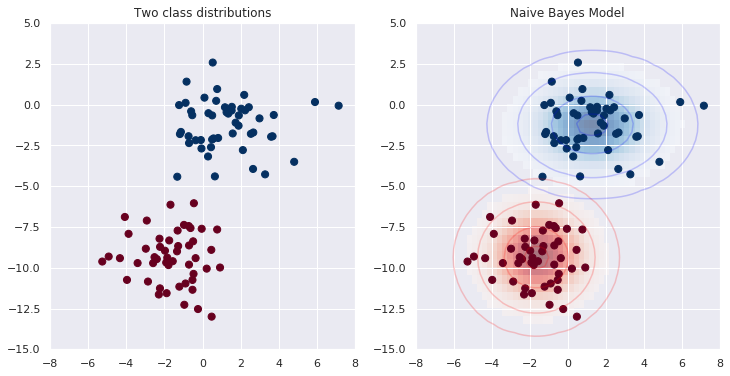

In [79]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))

# original data

ax[0].scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');
ax[0].set_title('Two class distributions')

# naive base results
ax[1].scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax[1].set_title('Naive Bayes Model')

xlim = (-8, 8)
ylim = (-15, 5)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax[1].pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax[1].contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)
    
ax[0].set(xlim=xlim, ylim=ylim)
ax[1].set(xlim=xlim, ylim=ylim);

In [80]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

In [81]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

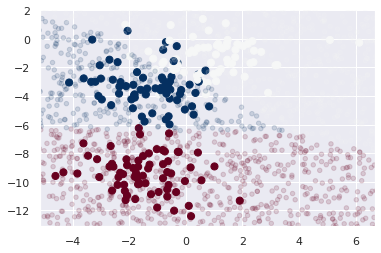

In [126]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.15)
plt.axis(lim);

We also get an associated probablity of a point belonging to one of the classes:

In [83]:
# last 5 points
yprob = model.predict_proba(Xnew)
yprob[-5:].round(2)

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

In [84]:
yprob_max = np.max(yprob, axis=1)
yprob_max[:10]

array([0.99999991, 0.99919407, 0.99994048, 1.        , 0.99952279,
       0.99998523, 1.        , 1.        , 0.99999996, 1.        ])

## Multi-class classfication: 

In [110]:
from sklearn.datasets import make_blobs
X, y = make_blobs(200, 2, centers=3, random_state=2, cluster_std=1.25)

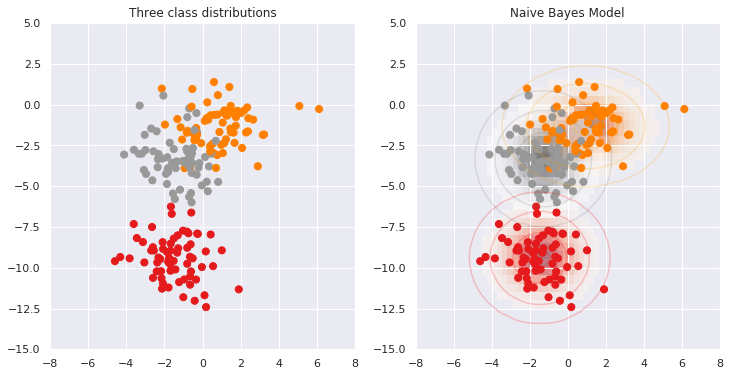

In [120]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))

# original data

ax[0].scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Set1');
ax[0].set_title('Three class distributions')

# naive base results
ax[1].scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Set1')
ax[1].set_title('Naive Bayes Model')

xlim = (-8, 8)
ylim = (-15, 5)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'orange', 'grey']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax[1].pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax[1].contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)
    
ax[0].set(xlim=xlim, ylim=ylim)
ax[1].set(xlim=xlim, ylim=ylim);

In [121]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

In [122]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

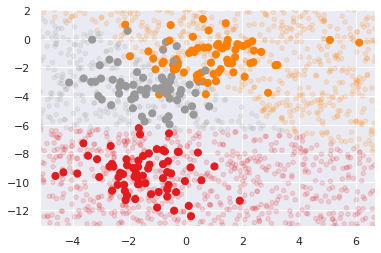

In [125]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Set1')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='Set1', alpha=0.15)
plt.axis(lim);

In [127]:
# last 5 points
yprob = model.predict_proba(Xnew)
yprob[-5:].round(2)

array([[1.  , 0.  , 0.  ],
       [0.8 , 0.  , 0.2 ],
       [0.99, 0.  , 0.01],
       [0.  , 0.97, 0.03],
       [0.83, 0.17, 0.  ]])

In [129]:
yprob_max = np.max(yprob, axis=1)

/opt/conda/lib/python3.6/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


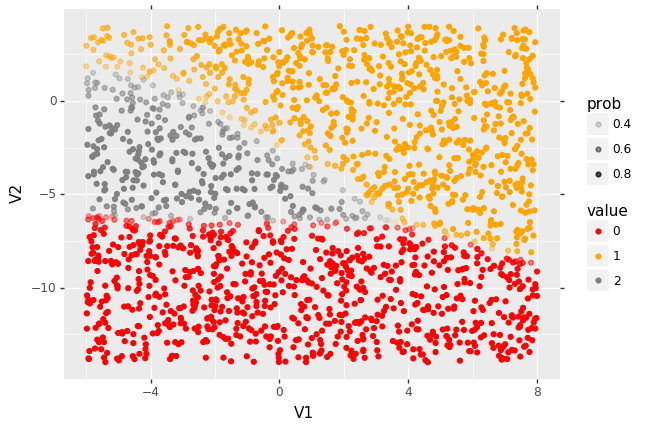

In [132]:
from plotnine import *
import pandas as pd

df = pd.DataFrame({'V1': Xnew[:, 0], 'V2': Xnew[:, 1], 'value': ynew.astype(str), 'prob': yprob_max})
p = ggplot(df, aes(x='V1', y='V2'))
p += geom_point(aes(alpha='prob', color='value'))
p += scale_alpha_continuous()
p += scale_color_manual(['red', 'orange', 'grey'])
p.draw();